# IND320 Project Work

 - **Github Link :** https://github.com/Mobashra/M-Abeer-Project
 - **Streamlit Link :** https://m-abeer-project.streamlit.app/



### Project Log

For this project, I worked with a weather dataset (`open-meteo-subset.csv`) and combined Jupyter Notebook analysis with a Streamlit interactive application.  

To maintain reproducibility, I created a virtual environment called **D2D_env**, installing key libraries such as `pandas`, `plotly`, `scikit-learn`, and `streamlit`. This setup allowed me to keep the workflow organized and isolated from other projects.  

In the ***Jupyter Notebook***, I processed the dataset by converting the `time` column to `pandas` datetime format for time-series analysis. Then, I used `plotly` to visualize the variables such as temperature, precipitation, wind speed, and wind direction over time. Since the variables had very different scales, I first attempted a multi-axis plot. However, to allow comparison on a single Y-axis, I applied **Min-Max normalization** from `scikit-learn` to rescale all values between 0 and 1. This provided a clearer view of how the parameters varied relative to each other.  

In the ***Streamlit App***, I built a simple multi-page dashboard to make the weather dataset interactive and easier to explore. 
- *Page 1:* An introduction and description of the dataset using styled text.
- *Page 2:* A mini trend chart of January, so users could quickly see how things changed over the month.
- *Page 3:* An interactive plot where users can choose a range of months and select which variable to graph. The plot updates automatically, making it more engaging compared to static notebook graphs.
- *Page 4:* For the last page, I included a fun element just to make the app a bit more personal and light-hearted.

 

 


### AI Usage

I leveraged ChatGPT to assist with **styling and formatting** in both Jupyter Notebook and the Streamlit app. When plotting multiple Y-axis variables on a single graph, I normalized the data using **MinMaxScaler**, with guidance from ChatGPT. Since **[Plotly](https://plotly.com/python/)** was new to me, I referred to both its official documentation and ChatGPT for implementation.

For the Streamlit app, most tasks were completed using the official **[Streamlit documentation](https://docs.streamlit.io/)**, while AI support was primarily used for text formatting and styling using Markdown.


### Importing all necessary libraries ###

In [1]:
import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

## Subtask 1 : Reading the CSV file and printing its content

This code reads a CSV file into a pandas DataFrame and shows the first 5 rows of the data by default.

In [2]:
df = pd.read_csv('../../IND320/Mobashra Abeer_Streamlit Project/open-meteo-subset.csv')
df.head()


time  temperature_2m (°C)  precipitation (mm)  \
0  2020-01-01T00:00                 -2.2                 0.1   
1  2020-01-01T01:00                 -2.2                 0.0   
2  2020-01-01T02:00                 -2.3                 0.0   
3  2020-01-01T03:00                 -2.3                 0.0   
4  2020-01-01T04:00                 -2.7                 0.0   

   wind_speed_10m (m/s)  wind_gusts_10m (m/s)  wind_direction_10m (°)  
0                   9.6                  21.3                     284  
1                  10.6                  23.0                     282  
2                  11.0                  23.5                     284  
3                  10.6                  23.3                     284  
4                  10.6                  22.8                     284

## Subtask 2 : Printing the contents of the file in a relevant way.

- Converting **'time'** column to **datetime** format of pandas to ensure that pandas recognizes it as a datetime object.
- Generating summary statistics for all columns. Since all our columns have numerical values, it is going to get the    *total count, mean, standard deviation, minimum, maximum, 25%, 50%, 75%*.
- Lastly, there is a concise summary of the DataFrame which shows:
  - Number of non-null entries per column
  - Data types of each column
  - Memory usage of the DataFrame


In [3]:
df['time'] = pd.to_datetime(df['time'])

# A general summary of the columns that shows the minimum, maximum, average and many more
print(df.describe(include='all'))

print("\n")

# A concise summary of the DataFrame
# It also shows no. of rows and columns with column names

print(df.info())


                      time  temperature_2m (°C)  precipitation (mm)  \
count                 8760          8760.000000         8760.000000   
mean   2020-07-01 11:30:00            -0.394909            0.222854   
min    2020-01-01 00:00:00           -19.300000            0.000000   
25%    2020-04-01 05:45:00            -4.900000            0.000000   
50%    2020-07-01 11:30:00            -1.000000            0.000000   
75%    2020-09-30 17:15:00             4.100000            0.200000   
max    2020-12-30 23:00:00            19.900000            5.800000   
std                    NaN             6.711903            0.493747   

       wind_speed_10m (m/s)  wind_gusts_10m (m/s)  wind_direction_10m (°)  
count           8760.000000           8760.000000             8760.000000  
mean               3.661689              8.300719              212.209589  
min                0.100000              0.200000                0.000000  
25%                1.800000              4.500000       

## Subtask 3 : Plotting each column separately




This dataset contains 5 variables that change over time. The goal is to visualize the time series of each variable individually. 

To achieve this, I have used **Plotly**, which allows for **interactive visualizations**. Each variable is plotted against time on its own graph, with a **clear title, axis labels, and a legend**. The interactive features of Plotly, such as **zooming, panning, and hover tooltips**, make it easier to explore patterns, trends, and anomalies in the data over time.  

Additionally, a **unified hover mode** is used to display all values at a specific time point simultaneously, enhancing readability and comparison between variables.


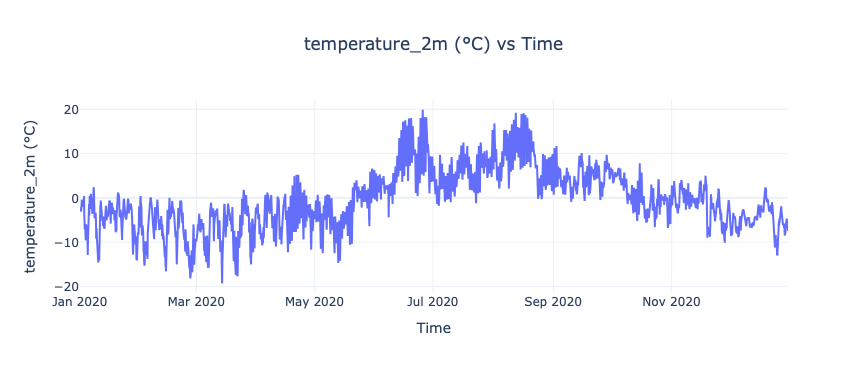

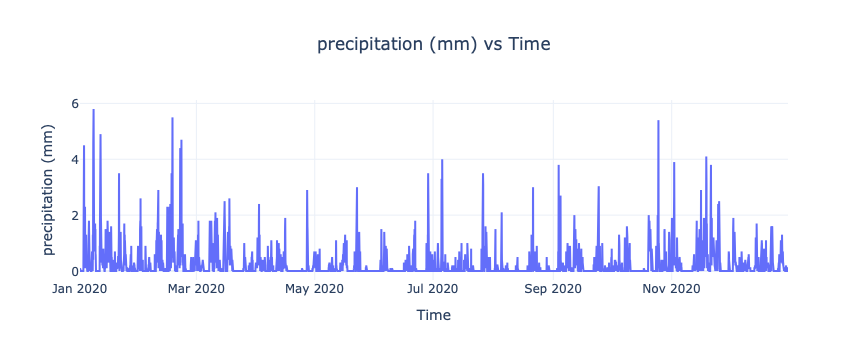

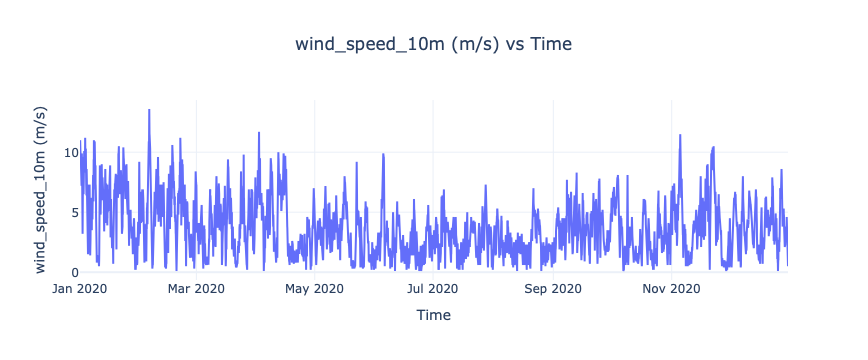

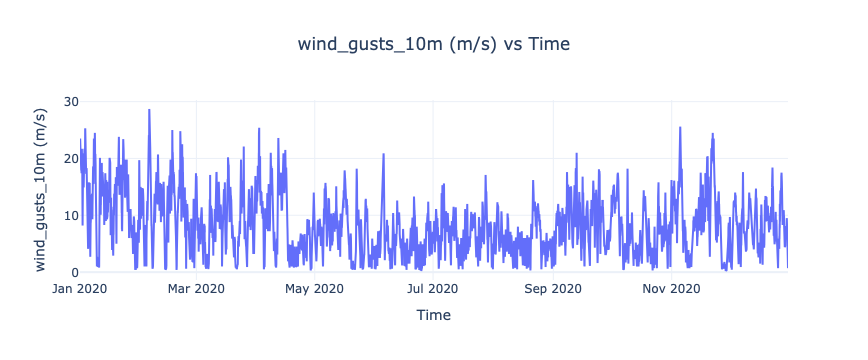

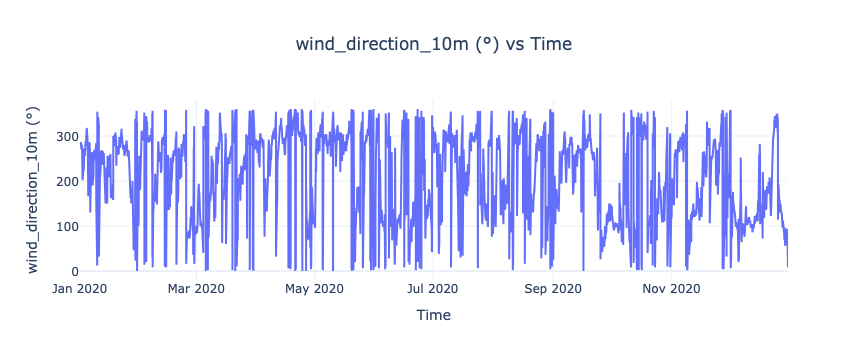

In [4]:
# Looping through columns (excluding the first one 'time')
for column in df.columns[1:]:
    
    # Creates an interactive plot
    fig = go.Figure()

    # Takes the time values for x and the current column values for Y, 
    # drawing a line connecting them, 
    # Then, adding it to the figure with the column name in the legend.
    fig.add_trace(go.Scatter(
        x = df['time'], 
        y = df[column],
        mode = 'lines', 
        name = column
    ))

    # customizing the layout of a figure using the method update_layout of plotly
    fig.update_layout(
        title = f"{column} vs Time",
        title_x = 0.5,  # center position for the title
        xaxis_title = "Time",
        yaxis_title = column,
        template = "plotly_white", 
        hovermode = "x unified",  # shows all values on hover for same x
        
        # styling for the legend
        legend = dict(
            orientation = "h", 
            yanchor = "bottom",
            y = 1.02,
            xanchor = "right",
            x = 1
        )
    )
    
    fig.show()

## Subtask 4 : Plotting all columns together
The columns have different scales, so to plot them together, **Min-Max normalization** has been applied. This scales all variables to a range between *0* and *1*, allowing data with different units and ranges to be plotted on a **single Y-axis**. 


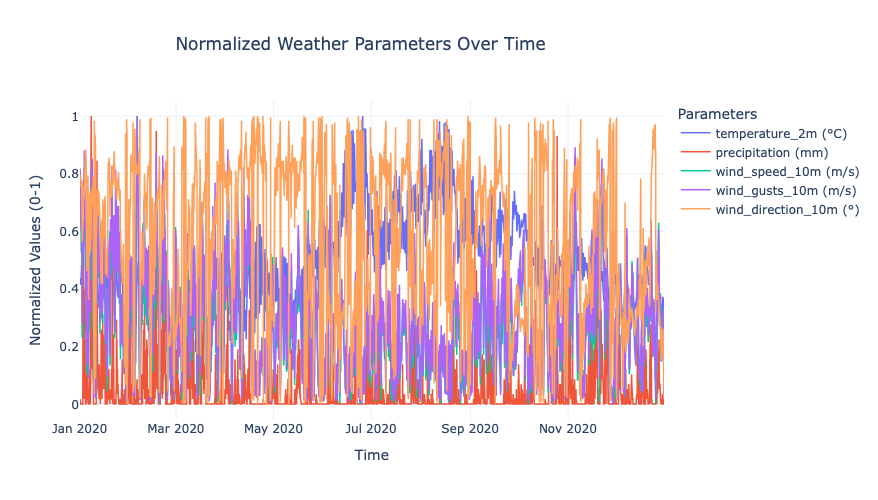

In [5]:
# Copying the original dataframe to avoid modifying it
df_normalized = df.copy()

# List of weather-related columns to normalize and plot
cols_to_plot = [
    'temperature_2m (°C)',
    'precipitation (mm)',
    'wind_speed_10m (m/s)',
    'wind_gusts_10m (m/s)',
    'wind_direction_10m (°)'
]

# Applying Min-Max normalization to scale values between 0 and 1
scaler = MinMaxScaler()
df_normalized[cols_to_plot] = scaler.fit_transform(df_normalized[cols_to_plot])

# Creating an empty Plotly figure
fig = go.Figure()

# Adding each normalized column as a separate line trace 
for columns in cols_to_plot:
    fig.add_trace(go.Scatter(
        x = df_normalized['time'],  # time values
        y = df_normalized[columns], # normalized column values
        mode = 'lines',             
        name = columns,                
        line = dict(width = 1.5)      # Set line thickness
    ))

# Customizing layout of the figure
fig.update_layout(
    title = "Normalized Weather Parameters Over Time",  
    title_x = 0.2,                                     
    xaxis_title = "Time",                               
    yaxis_title = "Normalized Values (0-1)",           
    template = "plotly_white",                          
    hovermode = "x unified",                           
    width = 850,                                       
    height = 500,    
    
    # Customize legend
    # xanchor, yanchor = Determines which part of the legend box aligns coordinate.
    legend = dict(                                     
        title = "Parameters",
        orientation = "v",        # Vertical legend
        yanchor = "top",
        y = 1,
        xanchor = "left",
        x = 1.02                  # Position legend outside the plot on the right
    ),
    margin = dict(r = 150)        # Extra margin for legend
)

# Displaying the interactive plot
fig.show()
